## Meterological Data Analysis

#### The Meteorological Dataset Consists of:

* Total Number of Data Point: 96453
* Total Number of Attribute/Columns in data set is 12.

#### Attribute Information:

1. Formatted Date
2. Summary
3. Precip Type
4. Temperature (C)
5. Apparent Temperature (C)
6. Humidity
7. Wind Speed (km/h)
8. Wind Bearing (degrees)
9. Visibility (km)
10. Loud Cover
11. Pressure (millibars)
12. Daily Summary

In [13]:
#import libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [14]:
#data = pd.read_csv('/kaggle/input/weather-dataset/weatherHistory.csv')
data = pd.read_csv('weatherHistory.csv')

data.shape

(96453, 12)

In [15]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [16]:
df = data.copy()
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [17]:
# let's correct the dtype of formatted date

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [18]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

**Before moving forward, let's check for missing values**

In [19]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## EDA

**CATEGORICAL FEATURES**

In [20]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"len of categorical features {len(categorical_features)}")

len of categorical features 3


In [21]:
df[categorical_features].head()

,Summary,Precip Type,Daily Summary
0,Partly Cloudy,rain,Partly cloudy throughout the day.
1,Partly Cloudy,rain,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,Partly cloudy throughout the day.
3,Partly Cloudy,rain,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,Partly cloudy throughout the day.


In [22]:
#drop the Daily summary column
df.drop('Daily Summary', axis=1, inplace=True)

In [23]:
print("%14s %15s %15s" %("column","Distinct","Null"))
for col in ['Summary','Precip Type']:
    uniq = df[col].nunique()
    na = df[col].isnull().sum()
    print("%14s %15s %15s" %(col,uniq,na))

        column        Distinct            Null
       Summary              27               0
   Precip Type               2             517


In [24]:
data.groupby('Precip Type')['Temperature (C)'].mean()

Precip Type
rain    13.852989
snow    -3.270885
Name: Temperature (C), dtype: float64

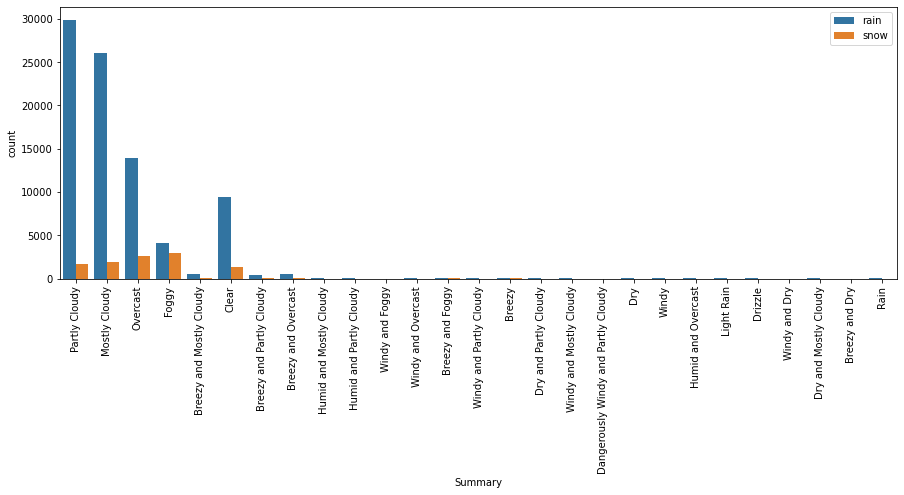

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x='Summary',hue='Precip Type', data=df)
plt.legend(loc='upper right') #1
plt.xticks(rotation='vertical')
plt.show()

**Numerical Features**

In [26]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"len of categorical features {len(numerical_features)}")

len of categorical features 9


In [27]:
df[numerical_features].head(3)

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94


**Now since we have been given hourly data, we need to resample it monthly. Resampling is a convenient method for frequency conversion. Object must have a datetime like index**

### After Resampling

In [28]:
df1 = df.set_index('Formatted Date')
df1 = df1[['Apparent Temperature (C)','Humidity']].resample('MS').mean()
df1

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625
...,...,...
2016-08-01 00:00:00+00:00,21.383094,0.674046
2016-09-01 00:00:00+00:00,18.355833,0.688833
2016-10-01 00:00:00+00:00,8.923947,0.799906


**Here, MS means Monthly Starting. we are displaying the average Apparent temperature w.r.t Humidity with help of mean().**

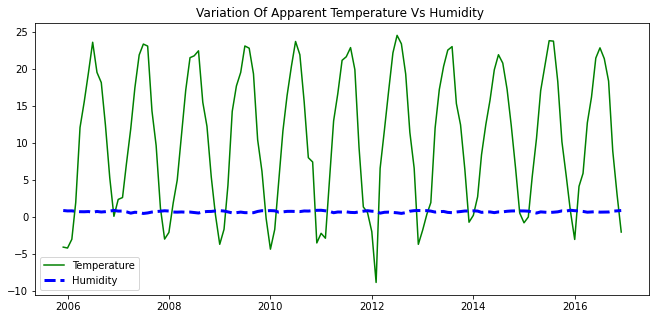

In [29]:
# relation between temperature and Humidity
plt.figure(figsize=(11,5))
plt.plot(df1['Apparent Temperature (C)'], label="Temperature", color="green")
plt.plot(df1['Humidity'], label="Humidity", color="blue", linestyle="dashed", linewidth=3)
plt.title("Variation Of Apparent Temperature Vs Humidity ")
plt.legend(loc="best")
plt.show()

**Observation**
- from the above graph we can say that Humidity is almost constant in these years. and temperature is also the same as peak lies on same line.

**The problem statement suggest that to check the variation of humidity of all the 10 years (2006-2016). so let;s check the graph for some months separately**

**Analysis of Variation of Temperature w.r.t Humidity from 2006 to 2016 in different months.**

In [30]:
# Jan 2006 to Jan 2016

In [31]:
jan = df1[df1.index.month==1]
jan.head(2)

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2007-01-01 00:00:00+00:00,2.387015,0.813495


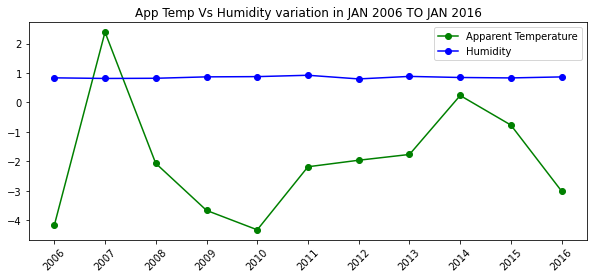

In [32]:
plt.figure(figsize=(10,4))
plt.plot(jan.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'],
        marker='o',label="Apparent Temperature",linestyle='-',color="green")
plt.plot(jan.loc['2006-01-01':'2016-01-01','Humidity'],marker='o',
        linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in JAN 2006 TO JAN 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

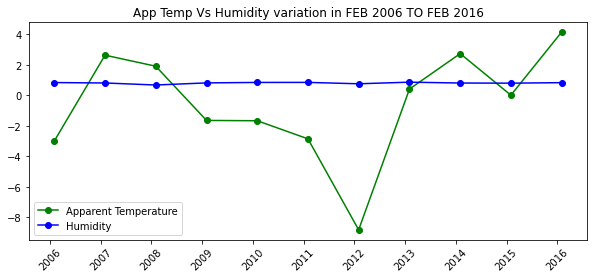

In [33]:
feb = df1[df1.index.month==2]

plt.figure(figsize=(10,4))
plt.plot(feb.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],
        marker='o',linestyle='-',label="Apparent Temperature",color="green")
plt.plot(feb.loc['2006-02-01':'2016-02-01','Humidity'],
        marker='o',linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in FEB 2006 TO FEB 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

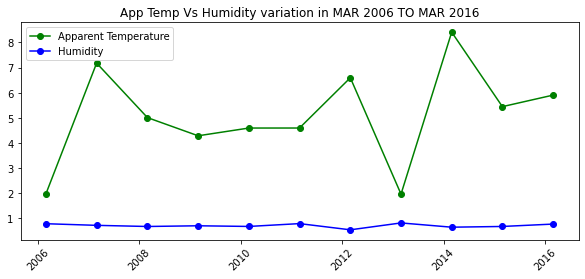

In [34]:
march = df1[df1.index.month==3]

plt.figure(figsize=(10,4))
plt.plot(march.loc['2006-03-01':'2016-03-01','Apparent Temperature (C)'],
        marker='o',linestyle='-',label="Apparent Temperature",color="green")
plt.plot(march.loc['2006-03-01':'2016-03-01','Humidity'],
        marker='o',linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in MAR 2006 TO MAR 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

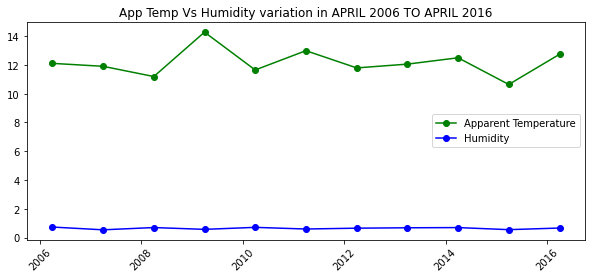

In [35]:
april = df1[df1.index.month==4]

plt.figure(figsize=(10,4))
plt.plot(april.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'],
        marker='o',linestyle='-',label="Apparent Temperature",color="green")
plt.plot(april.loc['2006-04-01':'2016-04-01','Humidity'],
        marker='o',linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in APRIL 2006 TO APRIL 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

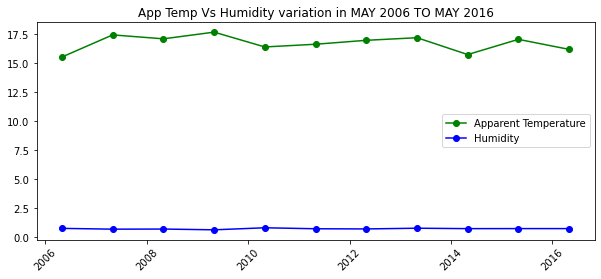

In [36]:
may = df1[df1.index.month==5]

plt.figure(figsize=(10,4))
plt.plot(may.loc['2006-05-01':'2016-05-01','Apparent Temperature (C)'],
        marker='o',linestyle='-',label="Apparent Temperature",color="green")
plt.plot(may.loc['2006-05-01':'2016-05-01','Humidity'],
        marker='o',linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in MAY 2006 TO MAY 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

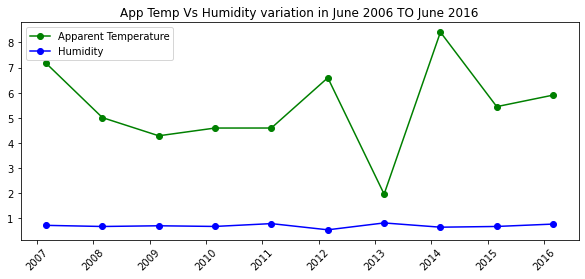

In [37]:
june = df1[df1.index.month==6]

plt.figure(figsize=(10,4))
plt.plot(march.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'],
        marker='o',linestyle='-',label="Apparent Temperature",color="green")
plt.plot(march.loc['2006-06-01':'2016-06-01','Humidity'],
        marker='o',linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in June 2006 TO June 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

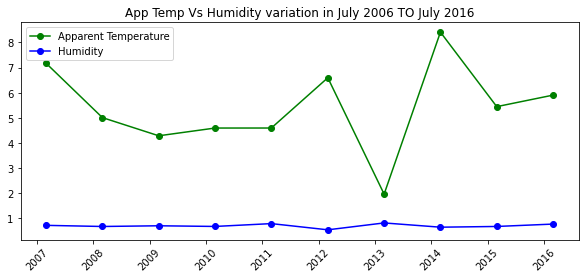

In [38]:
july = df1[df1.index.month==6]

plt.figure(figsize=(10,4))
plt.plot(march.loc['2006-07-01':'2016-07-01','Apparent Temperature (C)'],
        marker='o',linestyle='-',label="Apparent Temperature",color="green")
plt.plot(march.loc['2006-07-01':'2016-07-01','Humidity'],
        marker='o',linestyle='-',label="Humidity",color="blue")
plt.title("App Temp Vs Humidity variation in July 2006 TO July 2016")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.show()

**OBSERVATIONS**
- With respect to humidity appraent temperature every year and every month varying a lot. sometimes it is at peak and sometimes temp fall down.
- humidity is as constant as app temp varies according to month each year.

**Let's check Wind speed w.r.t Humidity**

In [39]:
df2 = df.set_index('Formatted Date')
df2 = df2[['Temperature (C)','Wind Speed (km/h)','Humidity']].resample('MS').mean()
df2

,Temperature (C),Wind Speed (km/h),Humidity
Formatted Date,,,
2005-12-01 00:00:00+00:00,0.577778,17.114300,0.890000
2006-01-01 00:00:00+00:00,-1.677942,8.894211,0.834610
2006-02-01 00:00:00+00:00,-0.065394,10.957008,0.843467
2006-03-01 00:00:00+00:00,4.559274,14.421488,0.778737
2006-04-01 00:00:00+00:00,12.635031,10.930670,0.728625
...,...,...,...
2016-08-01 00:00:00+00:00,21.420296,9.151378,0.674046
2016-09-01 00:00:00+00:00,18.467924,6.849029,0.688833
2016-10-01 00:00:00+00:00,9.893242,11.566855,0.799906


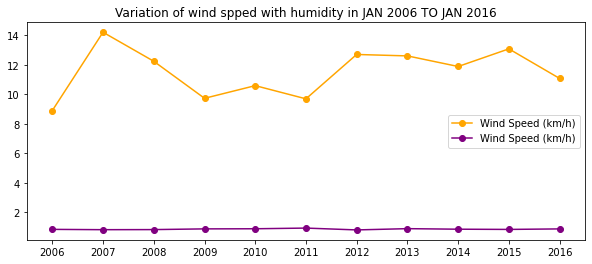

In [40]:
janw = df2[df2.index.month == 1]

plt.figure(figsize=(10,4))
plt.plot(janw.loc['2006-01-01':'2016-01-01','Wind Speed (km/h)'],
        marker='o',linestyle='-',color="orange", label="Wind Speed (km/h)")
plt.plot(janw.loc['2006-01-01':'2016-01-01','Humidity'],
        marker='o',linestyle='-',color="purple", label="Wind Speed (km/h)")
plt.title("Variation of wind spped with humidity in JAN 2006 TO JAN 2016")
plt.legend(loc="best")
plt.show()

##  "Humidity" is better Feature than "Apparent Temperature (C)".There is no change in Humidity from 2006–2016.